<a href="https://colab.research.google.com/github/Vaishnavi-Devi-N/CapstoneProjectEDA/blob/main/EDA_project_on_hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [153]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Almabetter/CSV of pandas projects /Hotel_Booking.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
link = '/kaggle/input/hotel-booking-almabetter-csv/Hotel Bookings (1).csv'
data = pd.read_csv(file_path)



Step 1: Remove duplicate or irrelevant observations. Remove unwanted observations from your dataset, including duplicate observations or irrelevant observations. ...

Step 2: Fix structural errors. ...

Step 3: Filter unwanted outliers. ...

Step 4: Handle missing data. ...

Step 5: Validate and QA.

In [155]:
duplicate_data = pd.read_csv(file_path)

In [156]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [157]:
#sorting columns with null values to see which columns has undefined data
data.isna().sum().sort_values(ascending = False)


company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

**Handling duplicate**

In [158]:
data.duplicated().value_counts()

False    87396
True     31994
Name: count, dtype: int64

In [159]:
data.shape

(119390, 32)

In [160]:
data.drop_duplicates(inplace = True)

In [161]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [162]:
data.shape

(87396, 32)

In [163]:

data.duplicated().value_counts()

False    87396
Name: count, dtype: int64

**Handling null values**

In [164]:
data['company'].fillna(0, inplace = True)
data['country'].fillna('others', inplace = True)
data['children'].fillna(0, inplace = True)
data['agent'].fillna('self booking', inplace = True)

In [165]:
# Convert 'required_car_parking_spaces' column from float to integer
nan_rows = data[data['required_car_parking_spaces'].isna()]

# Display rows where 'required_car_parking_spaces' column has NaN values
print(nan_rows)


# data['required_car_parking_spaces'] = data['required_car_parking_spaces'].astype(int)
# data.head()

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

[0 rows x 32 columns]


In [166]:
data['company'] = data['company'].astype(int)

In [167]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,self booking,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,self booking,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,self booking,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [168]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**Data wrangling step**

In [169]:
#Add structure to the Dataset
value_counts_result = data.value_counts()  # Calculate value counts
print(value_counts_result)

hotel         is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  country  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  agent         company  days_in_waiting_list  customer_type  adr    required_car_parking_spaces  total_of_special_requests  reservation_status  reservation_status_date
City Hotel    0            0          2015               August              31                        1                          0                        1                     2       0.0       0       BB    PRT      Direct          Direct                0                  0                       0                               A                   A                   0                No Deposit    self booking  0        0     

In [170]:
#duplicate dataset
data_copy = data.copy()

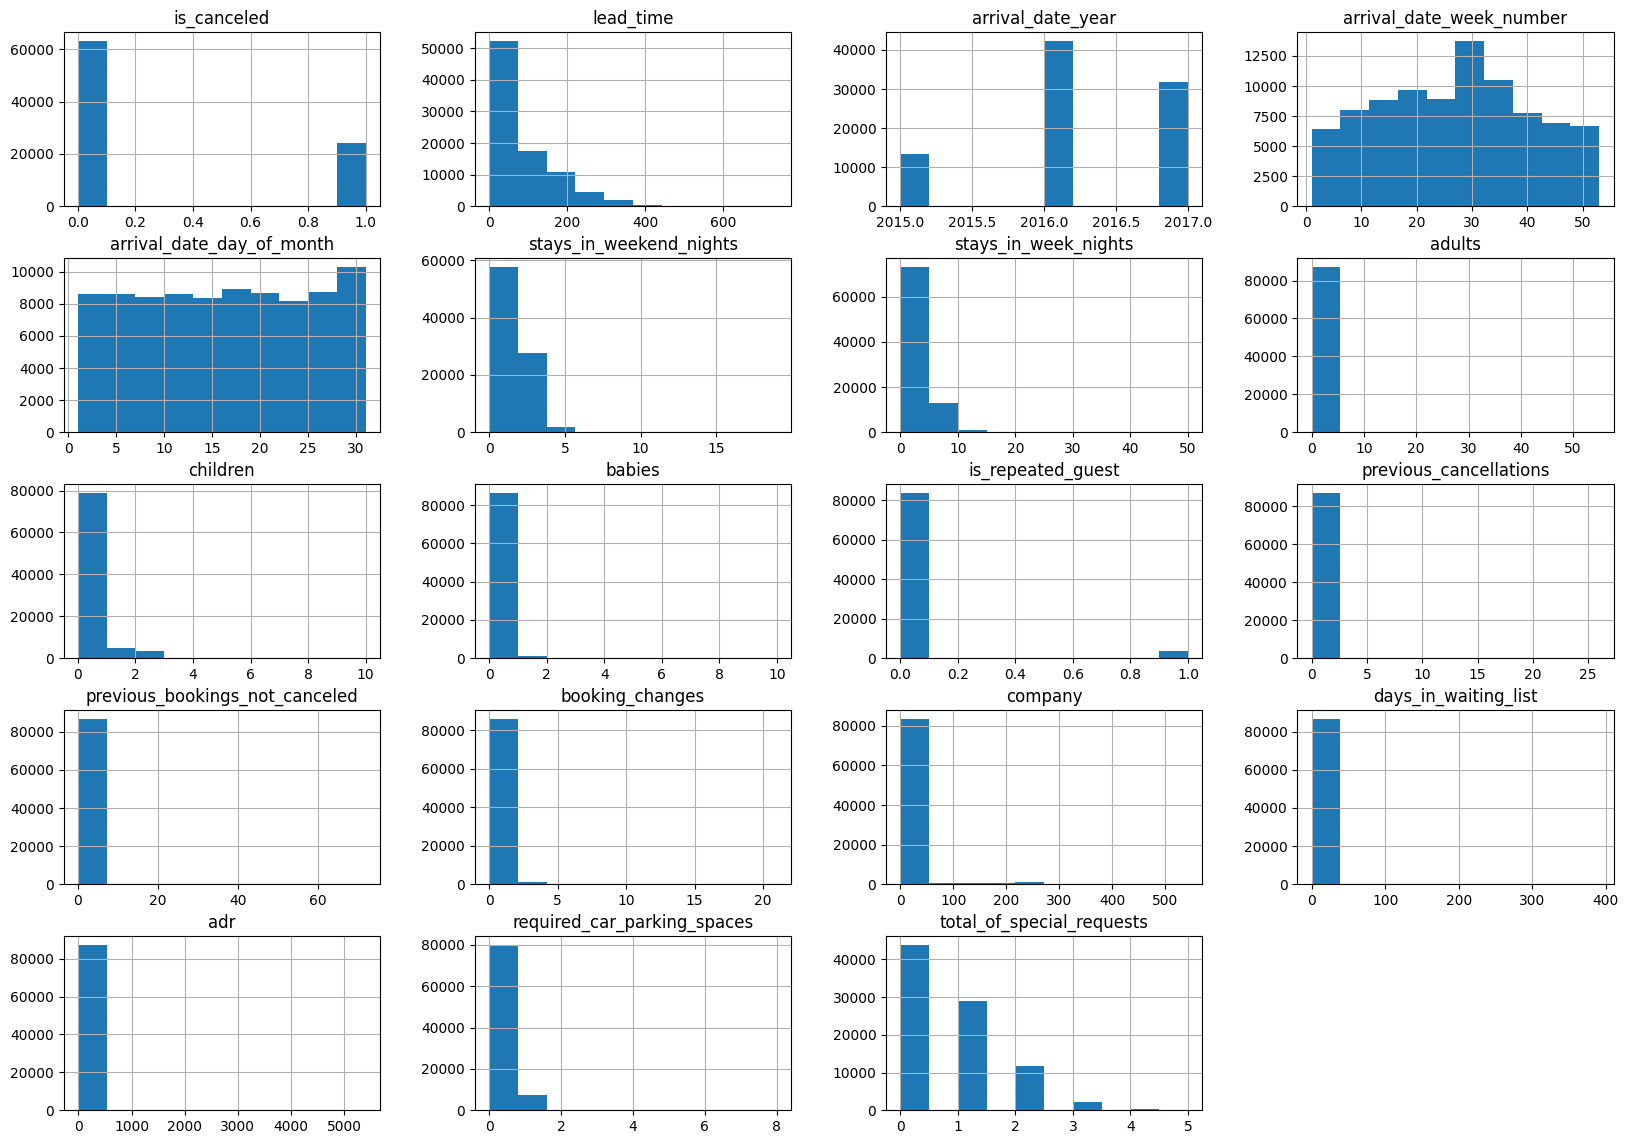

In [171]:
data.hist(figsize=(20,14))
plt.show()

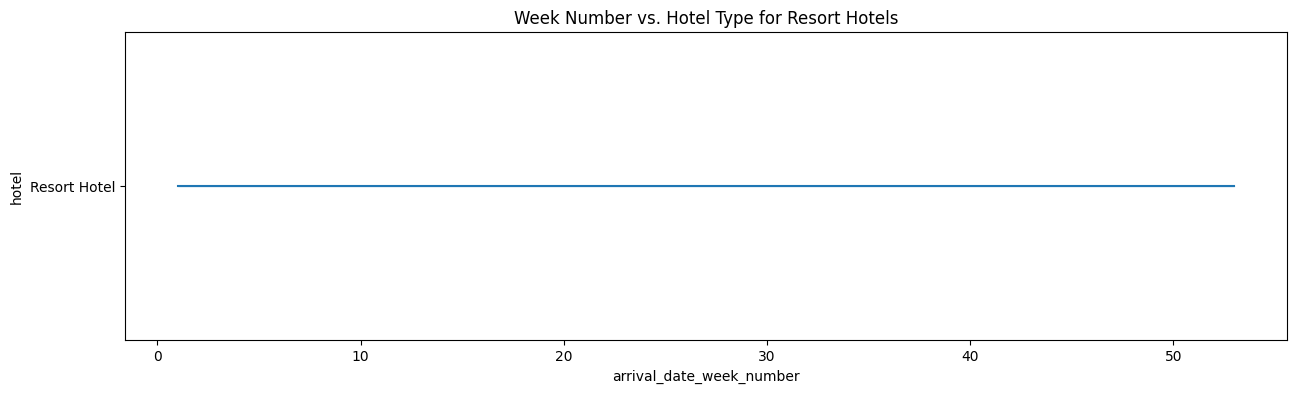

In [172]:
plt.figure(figsize=(15, 4))
sns.lineplot(x='arrival_date_week_number', y='hotel', data=data[data['hotel']=='Resort Hotel'])

# Customize the plot
plt.xlabel('arrival_date_week_number')
plt.ylabel('hotel')
plt.title('Week Number vs. Hotel Type for Resort Hotels')

# Show the plot
plt.show()

In [173]:
#incomplete insight / -------------------------------/

filtered_data = data[data['hotel'] != 'City hotel']

# Calculate descriptive statistics for the filtered data
statistics = filtered_data['arrival_date_week_number'].describe()
statistics

count    87396.000000
mean        26.838334
std         13.674572
min          1.000000
25%         16.000000
50%         27.000000
75%         37.000000
max         53.000000
Name: arrival_date_week_number, dtype: float64

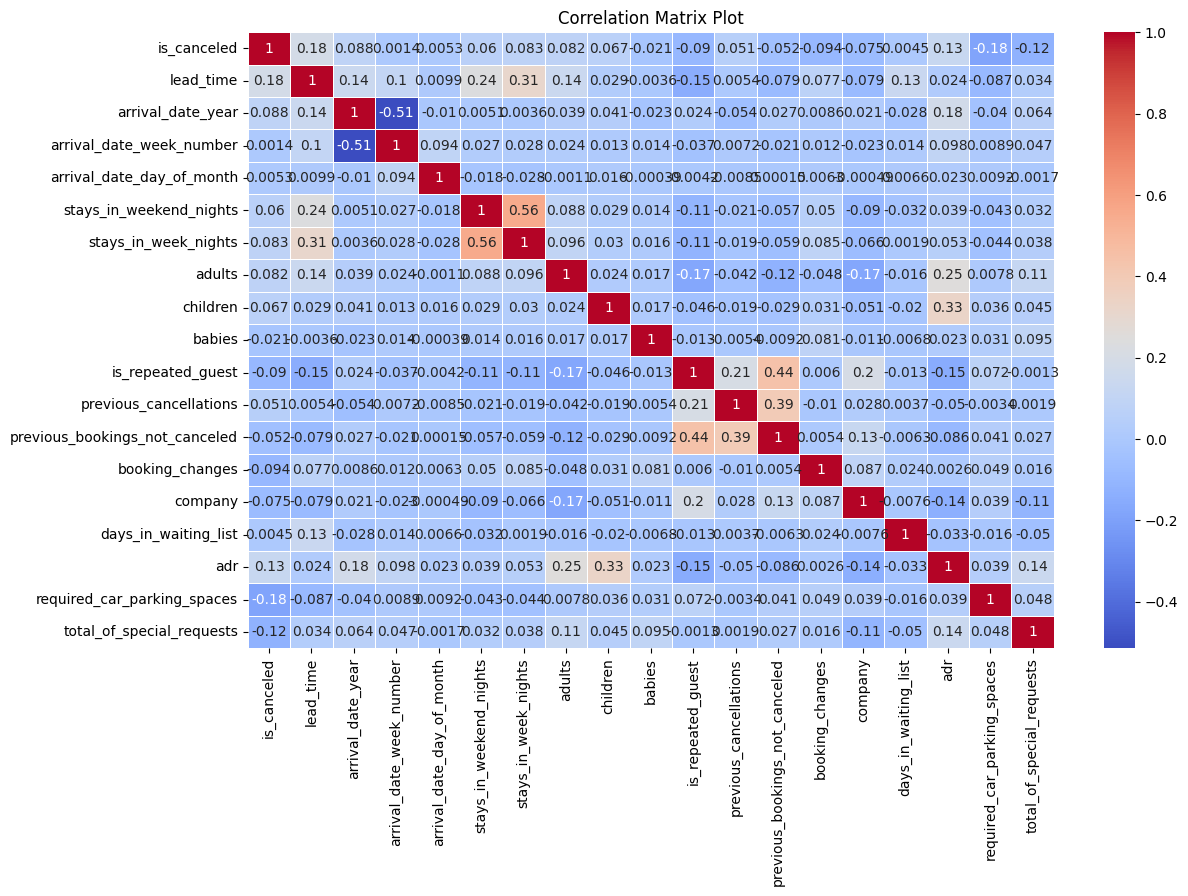

In [174]:
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(13,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize the plot
plt.title('Correlation Matrix Plot')
plt.show()

In [175]:
data['Hotel_num'] = data['hotel'].map({'Resort Hotel': 1, 'City Hotel': 2})
data['depo'] = data['deposit_type'].map({'No Deposit': 1, 'Non Refund': 2, 'Refundable': 3})
#data['status_show'] = data['reservation_status'].map({'canceled'})

| Field                      | Description                                                      |
|----------------------------|------------------------------------------------------------------|
| Hotel                      | H1 = Resort Hotel, H2 = City Hotel                               |
| is_cancelled               | If the booking was cancelled (1) or not (0)                      |
| lead_time                  | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
| arrival_date_year          | Year of arrival date                                             |
| arrival_date_month         | Month of arrival date                                            |
| arrival_date_week_number   | Week number for arrival date                                     |
| arrival_dat_day            | Day of arrival date                                              |
| stays_in_weekend_nights    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| stays_in_week_nights       | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| adults                     | Number of adults                                                 |
| children                   | Number of children                                               |
| babies                     | Number of babies                                                 |
| meal                       | Kind of meal opted for                                           |
| country                    | Country code                                                     |
| market_segment             | Which segment the customer belongs to                             |
| Distribution_channel       | How the customer accessed the stay - corporate booking/Direct/TA.TO |
| is_repeated_guest          | Guest coming for the first time or not                            |
| previous_cancellation      | Was there a cancellation before                                   |
| previous_bookings          | Count of previous bookings                                       |
| reserved_room_type         | Type of room reserved                                            |
| assigned_room_type         | Type of room assigned                                            |
| booking_changes            | Count of changes made to booking                                  |
| deposit_type               | Deposit type                                                     |
| agent                      | Booked through agent                                             |
| days_in_waiting_list       | Number of days in the waiting list                               |
| customer_type              | Type of customer                                                 |
| required_car_parking       | If car parking is required                                       |
| total_of_special_req       | Number of additional special requirements                        |
| reservation_status         | Reservation status                                               |
| reservation_status_date    | Date of the specific status                                      |


In [176]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Hotel_num,depo
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,1,1


In [177]:
#Move Hotel Num colum to initial
column_name = 'Hotel_num'
data = data[[column_name] + [col for col in data if col != column_name]]

In [178]:
# Get the column names of df1 and df2
columns_df1 = set(data.columns)
columns_df2 = set(numerical_data.columns)

# Find columns in df1 that are not in df2
columns_only_in_df1 = columns_df1 - columns_df2

# Convert the result to a list (if needed)
columns_only_in_df1_list = list(columns_only_in_df1)

# Print or use the result
print("Columns in df1 but not in df2:", columns_only_in_df1_list)


Columns in df1 but not in df2: ['hotel', 'meal', 'reserved_room_type', 'arrival_date_month', 'reservation_status', 'distribution_channel', 'country', 'market_segment', 'deposit_type', 'reservation_status_date', 'agent', 'assigned_room_type', 'customer_type', 'depo', 'Hotel_num']


In [179]:

# Define a function to compare 'reserved_room_type' and 'assigned_room_type'
def compare_rooms(row):
    if row['reserved_room_type'] == row['assigned_room_type']:
        return 0
    elif row['reserved_room_type'] < row['assigned_room_type']:
        return -1
    else:
        return 1

# Apply the function to create a new column 'room_type_difference'
data['room_type_difference'] = data.apply(compare_rooms, axis=1)


In [180]:
data.head()

,Hotel_num,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,depo,room_type_difference
0,1,Resort Hotel,0,342,2015,July,27,1,0,0,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,0
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,0
2,1,Resort Hotel,0,7,2015,July,27,1,0,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,-1
3,1,Resort Hotel,0,13,2015,July,27,1,0,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0
4,1,Resort Hotel,0,14,2015,July,27,1,0,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,1,0


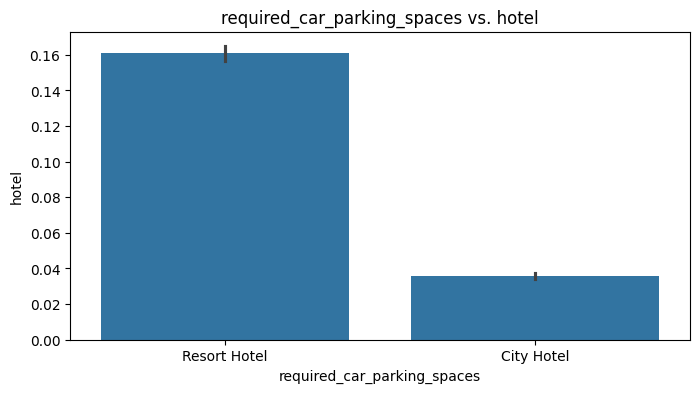

In [181]:
plt.figure(figsize=(8, 4))
sns.barplot(x='hotel', y='required_car_parking_spaces', data=data)

# Customize the plot
plt.xlabel('required_car_parking_spaces')
plt.ylabel('hotel')
plt.title('required_car_parking_spaces vs. hotel')
plt.xlim(-0.5, 1.5)
# Show the plot
plt.show()

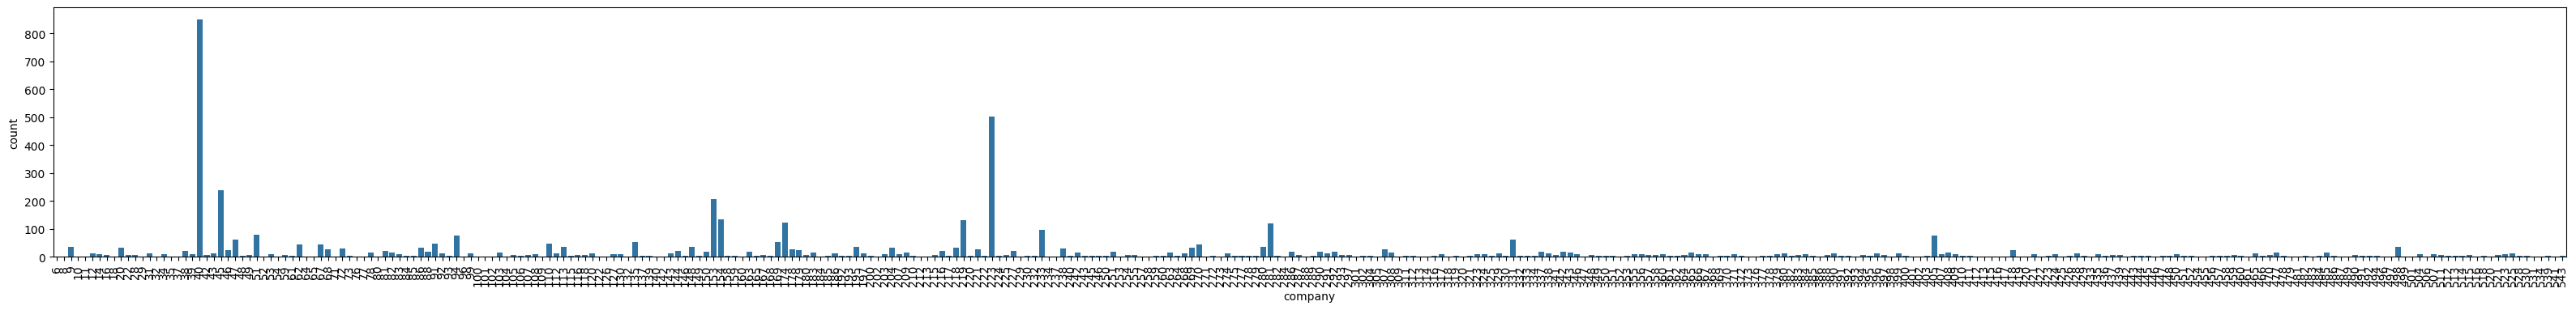

In [183]:
# dummy_data= data[complany]
plt.figure(figsize=(40, 4))

sns.countplot(data= data[data['company'] != 0], x='company')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()

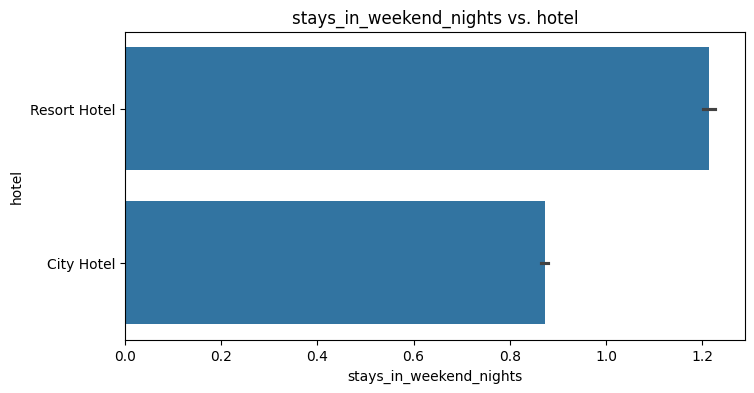

In [184]:
plt.figure(figsize=(8, 4))
sns.barplot(x='stays_in_weekend_nights', y='hotel', data=data)

# Customize the plot
plt.xlabel('stays_in_weekend_nights')
plt.ylabel('hotel')
plt.title('stays_in_weekend_nights vs. hotel')

# Show the plot
plt.show()


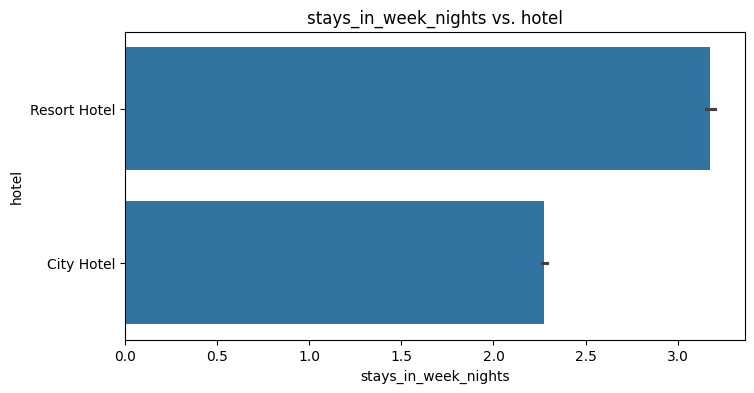

In [185]:
plt.figure(figsize=(8, 4))
sns.barplot(x='stays_in_week_nights', y='hotel', data=data)

# Customize the plot
plt.xlabel('stays_in_week_nights')
plt.ylabel('hotel')
plt.title('stays_in_week_nights vs. hotel')

# Show the plot
plt.show()


In [186]:
# Define a function to compare 'reserved_room_type' and 'assigned_room_type'
def compare_rooms(row):
    if row['reserved_room_type'] == row['assigned_room_type']:
        return 0
    elif row['reserved_room_type'] < row['assigned_room_type']:
        return -1
    else:
        return 1

# Apply the function to create a new column 'room_type_difference'
data['room_type_difference'] = data.apply(compare_rooms, axis=1)

In [187]:
#Arraival date month
month_mapping = {
   'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Use the map function to create a new column with numerical values
data['arrival_month_number'] = data['arrival_date_month'].map(month_mapping)

In [188]:
#Meal_mapping
Meal_mapping = {
    'BB': 1,
    'FB': 2,
    'HB': 3,
    'SC': 4,
    'Undefined': 5
}

# Use the map function to create a new column with numerical values
data['Meal_type'] = data['meal'].map(Meal_mapping)

In [189]:
data.head()

,Hotel_num,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,depo,room_type_difference,arrival_month_number,Meal_type
0,1,Resort Hotel,0,342,2015,July,27,1,0,0,...,Transient,0.0,0,0,Check-Out,2015-07-01,1,0,7,1
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,Transient,0.0,0,0,Check-Out,2015-07-01,1,0,7,1
2,1,Resort Hotel,0,7,2015,July,27,1,0,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,-1,7,1
3,1,Resort Hotel,0,13,2015,July,27,1,0,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,0,7,1
4,1,Resort Hotel,0,14,2015,July,27,1,0,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,1,0,7,1


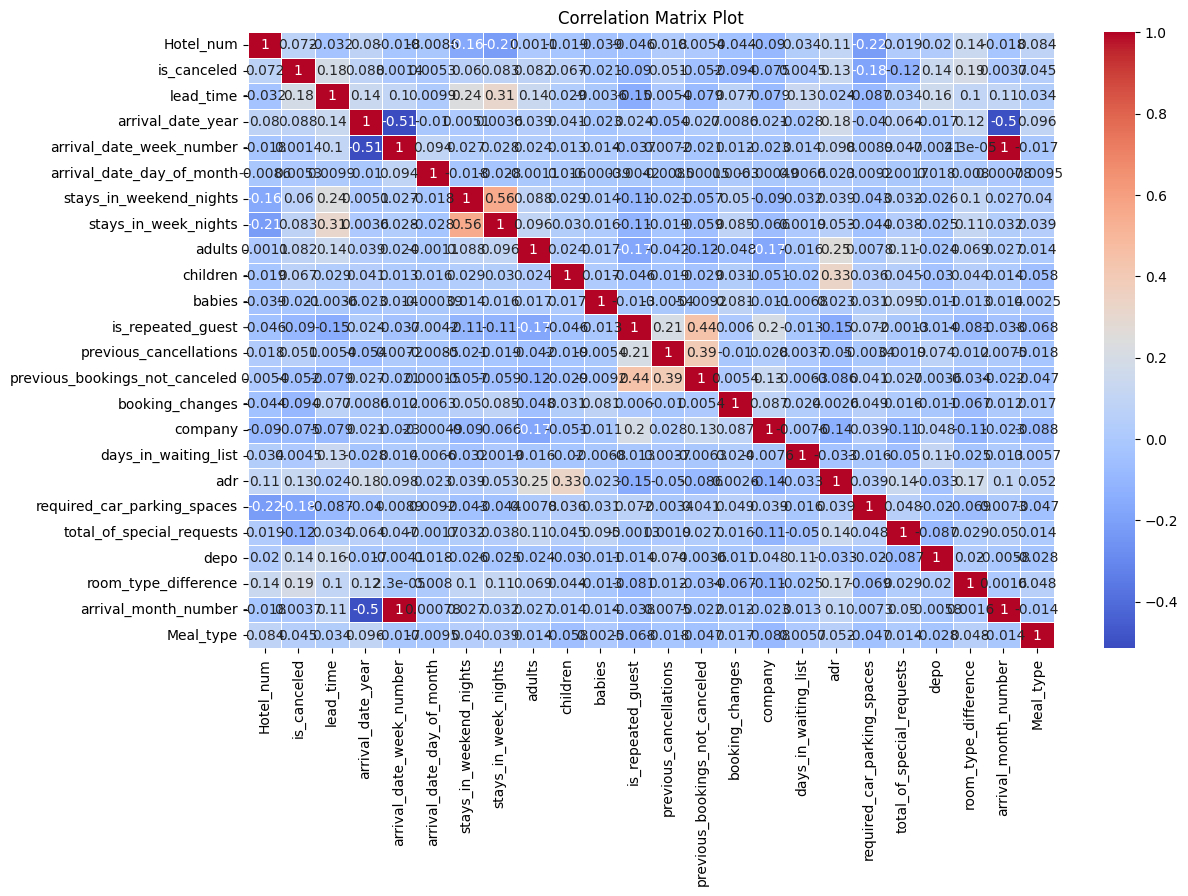

In [190]:
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(13,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize the plot
plt.title('Correlation Matrix Plot')
plt.show()

In [191]:
column_name = 'room_type_difference'
data = data[[column_name] + [col for col in data if col != column_name]]

In [192]:
data.head()

,room_type_difference,Hotel_num,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,depo,arrival_month_number,Meal_type
0,0,1,Resort Hotel,0,342,2015,July,27,1,0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,7,1
1,0,1,Resort Hotel,0,737,2015,July,27,1,0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,7,1
2,-1,1,Resort Hotel,0,7,2015,July,27,1,0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,7,1
3,0,1,Resort Hotel,0,13,2015,July,27,1,0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,7,1
4,0,1,Resort Hotel,0,14,2015,July,27,1,0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,1,7,1
